# Typisierung von Glass

In [1]:
# Dieses Programm löst ein Machine Learning Problem (Klassifizierung) zur Typbestimmung von Glass
# Benutzt wird folgendes Data Set: https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [2]:
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Erstellen eines Scatter Plots

In [3]:
glassarray = pd.read_csv('glass.csv', sep=',', header = None)

In [4]:
glassarray

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [5]:
Ri  = glassarray[0]
Na = glassarray[1]
Mg = glassarray[2]
Al = glassarray[3]
Si = glassarray[4]
K = glassarray[5]
Ca = glassarray[6]
Ba = glassarray[7]
Fe = glassarray[8]
Type = glassarray[9]

In [6]:
colorDict = ["green", "blue", "yellow", "red", "pink", "brown", "black", "grey"]
colorDict

['green', 'blue', 'yellow', 'red', 'pink', 'brown', 'black', 'grey']

In [7]:
colors = []
for i in glassarray[9]:
    colors.append(colorDict[i])

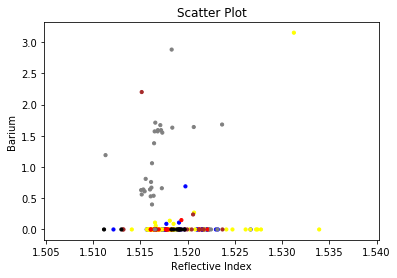

In [8]:
plt.scatter(Ri, Ba, c=colors, s=10)
plt.title('Scatter Plot')
plt.xlabel('Reflective Index')
plt.ylabel('Barium')
plt.show()

## Splitten in Test Data und Training Data

In [9]:
with open("glass.csv", "r") as f:
    data = f.read().split('\n')

In [10]:
train_data = []
test_data = []

In [11]:
for row in data:
    x = np.random.random()
    
    if x<=0.9:
        train_data.append(row)
    else:
        test_data.append(row)

In [12]:
# Trainieren eines Model mit Tensorflow

In [13]:
# Nur ausführen, wenn GLASS_Training.csv noch nicht existiert
# GLASS_Training = open('GLASS_Training.csv', 'w')
# for row in train_data:
    # GLASS_Training.write(row)
    # GLASS_Training.write('\n')
# GLASS_Training.close()

In [14]:
# Nur ausführen, wenn GLASS_Test.csv noch nicht existiert
# GLASS_Test = open('GLASS_Test.csv', 'w')
# for row in test_data:
    # GLASS_Test.write(row)
    # GLASS_Test.write('\n')
# GLASS_Test.close()

## Trainieren des Models

In [15]:
# Load datasets
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename="GLASS_Training.csv",
    target_dtype=np.int,
    features_dtype=np.float32)

test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
    filename="GLASS_Test.csv",
    target_dtype=np.int,
    features_dtype=np.float32)

In [16]:
# Define the training inputs
def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)
    #  y = tf.summary.scalar(, training_set.target)
    return x, y

In [17]:
# Define the test inputs
def get_test_inputs():
    x = tf.constant(test_set.data)
    y = tf.constant(test_set.target)
    return x, y

In [18]:
training_set.data

array([[  1.52101004,  13.64000034,   4.48999977, ...,   8.75      ,
          0.        ,   0.        ],
       [  1.51760995,  13.89000034,   3.5999999 , ...,   7.82999992,
          0.        ,   0.        ],
       [  1.51618004,  13.52999973,   3.54999995, ...,   7.78000021,
          0.        ,   0.        ],
       ..., 
       [  1.51684999,  14.92000008,   0.        , ...,   8.39999962,
          1.59000003,   0.        ],
       [  1.51651001,  14.38000011,   0.        , ...,   8.47999954,
          1.57000005,   0.        ],
       [  1.51710999,  14.22999954,   0.        , ...,   8.61999989,
          1.66999996,   0.        ]], dtype=float32)

In [19]:
training_set.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [20]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=9)]

In [21]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[64, 32, 16],
                                            n_classes=8, # Ausgabeneuronen
                                            model_dir="/tmp/glass_model1")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff7f76c8278>, '_save_checkpoints_steps': None, '_master': '', '_is_chief': True, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_num_worker_replicas': 0, '_session_config': None, '_evaluation_master': '', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_type': None, '_model_dir': '/tmp/glass_model1'}


In [22]:
classifier.fit(input_fn=get_train_inputs, steps=5000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/glass_model1/model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into /tmp/glass_model1/model.ckpt.
INFO:tensorflow:step = 5001, loss = 0.592237
INFO:tensorflow:global_step/sec: 405.665
INFO:tensorflow:step = 5101, loss = 0.587795 (0.250 sec)
INFO:tensorflow:global_step/sec: 569.805
INFO:tensorflow:step = 5201, loss = 0.576398 (0.186 sec)
INFO:tensorflow:global_step/sec: 399.117
INFO:tensorflow:step = 5301, loss = 0.578562 (0.241 sec)
INFO:tensorflow:global_step/sec: 596.433
INFO:tensorflow:step = 5401, loss = 0.573803 (0.165 sec)
INFO:tensorflow:global_step/sec: 92

DNNClassifier(params={'hidden_units': [64, 32, 16], 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x7ff80298fbf8>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=9, default_value=None, dtype=tf.float32, normalizer=None),), 'input_layer_min_slice_size': None, 'embedding_lr_multipliers': None, 'optimizer': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7ff7f76c8198>, 'dropout': None})

In [23]:
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nTest Accuracy: {0:.1f}%\n".format(100*accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-01-13:09:53
INFO:tensorflow:Restoring parameters from /tmp/glass_model1/model.ckpt-10000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-01-13:09:53
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.625, global_step = 10000, loss = 0.866635

Test Accuracy: 62.5%



## Neue Klassifizierung

In [24]:
def new_samples():
    return np.array(
    [[1.51789, 13.77, 4.5, 1.76, 74.77, 0.62, 8.22, 0.00, 0.19]], dtype=np.float32)

In [25]:
predictions = list(classifier.predict_classes(input_fn=new_samples))
predictions

INFO:tensorflow:Restoring parameters from /tmp/glass_model1/model.ckpt-10000


[1]

## Skatter Plot mit neuer Klassifizierung

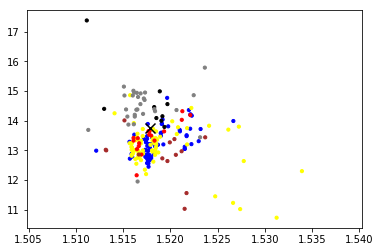

In [26]:
plt.scatter(Ri, Na, c=colors, s=10)
plt.scatter(new_samples()[0,0], new_samples()[0,1], c=["black"], marker="x", s=100)
plt.show()

### Erstellt Robin Friedrich & Lars Lochmann (2056628 & 2092616)